# Keep Calm: It's just a Linear Model!

In this Mission you will learn all about Linear Regression and Feature Engineering!

<img src="https://www.mihaileric.com/static/linear_regression_joke-9400ea8c70e0500f1934f7a22c86bc68-b75a8.png" alt="" style="width: 40%"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

You'll be working with a dataset containing information about houses sold in Ames, Iowa, USA. Imagine you are a data scientist in a real estate company,and your target is: Sale Price - you want to predict, based on a house's characteristics, what price it will be sold for.

Dataset features: 
 - `PID`: id, identifying house
 - `MS Zoning`: contains information about the zone the house is located in, levels:
  - A: Agriculture
  - C: Commercial
  - FV: Floating Village Residential
  - I: Industrial
  - RH: Residential High Density
  - RL: Residential Low Density
  - RM: Residential Medium Density
 - `Lot Frontage`: linear feet of street connected to property
 - `Lot Area`: lot size in square feet
 - `Overall Qual`: rates the overall material and finish of the house
 - `Full Bath`: number of full bathrooms
 - `Foundation`: type of foundation. Levels:
     - BrkTil: Brick & Tile
     - CBlock: Cinder Block
     - PConc: Poured Contrete
     - Slab: Slab
     - Stone: Stone
     - Wood: Wood
 - `Year Built`: year the house was built
 - `Yr Sold`: year the house was sold
 - `Neighborhood`: physical locations within Ames city limits
 - `Kitchen AbvGr`: number of kitchens
 - `Bedroom AbvGr`: number of bedrooms
 - `SalePrice`: **target** - the price the house was sold for (in USD)
 
### Load Data

In [2]:
df = pd.read_csv('houses.csv')

### Split data in Train and Test sets

In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,
                                     test_size=0.3, 
                                     random_state=42)

## Tasks:

Always start by taking a look at the dataset, getting familair with the variables and check any data issues, before diving into the problem.

### 1. Implement a simple Linear Regression.

Useful functions:
 - [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
 - [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In this task, your goal is to implement a simple linear regression to predict `SalePrice` given `Lot Area`, i.e., to find coefficients for equation: 

$$\hat{y} = mx + b$$

where: $\hat{y}$ is the predicted `SalePrice`, $m$ is the slope of the line, $x$ is `Lot Area` and $b$ is the bias (a constant). The optimal coefficients are the ones that minimize your **cost/loss** function. 

**Steps:**

 1. **Plot** the relationship between `Lot Area` and `SalePrice`
 2. Does there seem to be a **correlation**? If yes, is it positive or negative? What does that tell you about the value of $m$ (slope).
 3. Use provided function `plot_line` with different values of `slope` and `bias`, what pair of values would you choose based on your experiments and intuition?
 4. Get **predictions** for your training set (`df_train['Lot Area']`) using your guess of `slope` and `bias`, store it in a variable called `pred_guess`.
 5. Compute the **Mean Squared Error(MSE)** between the true values `df_train['SalePrice]` and the predicted values `pred_guess`. 
 6. Fit a Linear Regression model on your training data using Sklearn's `Linear Regression`.
 7. What is the equation of the fitted line? *Hint:* check your model's `.coef_` and `.intercept_` attributes in the documentation.
 8. Plot your fitted line using `plot_line` with the appropriate parameters.
 9. Get predictions for your training set and compute the MSE between the predictions and the true values.
 10. Compare the MSE with the one obtained with your initial guess.

In [4]:
'''
Plots the a scatterplot of SalePrice against Lot Area, a regression line and vertical lines
representing the error (distance) between predicted value and actual value for a sample of points.
 Receives:
     - slope: slope of the regression line
     - bias: bias of the regression line
'''
def plot_line(slope, bias):
    ax = sns.scatterplot(data = df_train, x = 'Lot Area', y = 'SalePrice')
    x = np.array([0,6000])
    ax.plot(x, slope*x + bias, c = 'r', label = 'Prediction')
    sample = df_train.sample(20)
    x = sample['Lot Area']
    ax.plot([x,x],[sample['SalePrice'],slope*x + bias], c='purple')
    p = df_train.loc[2518]
    x = p['Lot Area']
    ax.plot([x,x],[p['SalePrice'],slope*x + bias], c='purple', label = 'Error')
    plt.legend()

### 2. Multiple Linear Regression

Multiple Linear Regression is the name given to a Linear Regression done on two or more features. The idea is the same:

$$\hat{y} = m_1x_1 + m_2x_2 + ... + m_px_p + b $$

our prediction will be a linear combination of features $x_i$ ($p$ features) and $b$ is the bias (constant).

**Steps:**

1. Fit a new linear regression model, now including features: `'Lot Area', 'Overall Qual','Full Bath','Bedroom AbvGr','Year Built', 'Yr Sold'`
2. Make predictions with the new model for your training set. 
3. Get the MSE with the new predictions.
4. Did adding the new features help? 

### 3. Regularization Techniques

Useful functions:
 - [Ridge()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
 - [Lasso()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
 - [ElasticNet()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
 
**Steps:** 
 1. Fit 3 new linear regressions on the same training data from the previous task: one with Ridge regularization, one with Lasso regularizaton and one with ElasticNet regularization
 2. Make predictions for both training and test sets using the 3 different models.
 3. Compare the MSEs on the training set predictions. Did any regularization help?
 4. Compare the MSEs on the test set predictions. Did any regularization help? 
 5. (Optional:) Try different values for the regularizations' parameter `alpha` and see, if and how it impacts results.

**Remember:** regularization is used to prevent models from overfitting on the training set - it is normal that performance on the training set gets worse. Whether or not you should use regularization, and the type of regularization to use depends on the particular task at hand!

### 4. Feature Engineering

Useful Functions:

 - [SimpleImputer()](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
 - [KNNImputer()](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)
 - [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
 - [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
 - [RobustScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)
 - [OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

**Steps:**

 1. **Imputation**
     1. Check (if you haven't already 🤓) if your training dataset has null values. In which columns? Are the columns of the same type (numerical vs categorical)? 
     1. Split your training dataset `df_train` into three: one containing only the numerical features (name it `df_train_num`), one containing only the categorical features - without`PID` which is an id and not a feature -  (`df_train_cat`) and one with the target (`y_train`). 🧐**Attention:**
     2. Repeat step 1. for the testing dataset `df_test` (replacing `train` for `test`!)
     3. Import `SimpleImputer` from Sklearn and create two imputers: `imputer_num` and `imputer_cat`.
     4. Fit your imputer `imputer_num` on your numrical training data `df_train_num`, choosing an appropriate `strategy`. (Check the documentation and remember we are dealing with **numerical** variables.)
     5. Fit your imputer `imputer_cat` on your categorical **training data** `df_train_cat`, choosing an appropriate `strategy`. (we are dealing with **categorical** variables now!).
     6. Impute null values of both training and test numerical datasets (`df_train_num` and `df_test_num`) and store the new transformed data in the same variables, *i.e.,* `df_train_num` will now be the imputed version (`df_train_num = imputer_num.transform(df_train_num)`) 
     7. Repeat step 6. but now for the categorical data, now using `imputer_cat` and the categorical dataframes.
 2. **Scaling**
     1. Import a scaler of your choice and `fit` it on the numerical training data (`df_train_num`). *Hint:*`scaler = ...() scaler.fit()`
     2. Scale your `df_train_num` data and name the scaled version `df_train_num_scaled`. *Hint:*`scaler.transform()`
     3. Scale your `df_test_num` data and name the scaled version `df_test_num_scaled`. **REMEMBER:** Do not fit the scaler on the test data!!
 3. **Encoding**
     1. Import `OneHotEncoder` from sklearn and instatiate it `ohe = OneHotEncoder(sparse=False)`. (🤓 the `sparse = False` argument keeps the encoder from returning a sparse array - a special type of array useful to speed computations. Do not worry about this for now)
     2. Fit your encoder on your categorical training data (`df_train_cat`). *Hint: `ohe.fit(...)`*
     3. Encode both training and test categorical data with your encoder (`ohe.transform(...)`) and store the encoded versions in `df_train_ohe` and `df_test_ohe`. 
     4. Check the shapes of `df_train_ohe` and `df_test_ohe`. Do they make sense to you? Check the number of levels of your categorical features (💭 `.value_counts()`)
 4. **Putting it all together** 
     1. We have now processed both categorical and numerical variables - separately. Notice how Sklearn transformations output **arrays** and not dataframes. (Worry not - we still have our features' names, we'll get them later!)
     2. Let's "glue" our numerical and categorical variables back together into new variables `df_train_proc` and `df_test_porc`, so we can use them to train a model. We can use numpy's `hstack` function:
     
     ```df_train_proc = np.hstack((df_train_num_scaled, df_train_ohe)) 
      df_test_proc = np.hstack((df_test_num_scaled, df_test_ohe))```
     3. Fit a new `Ridge()` model, `ridge_all = Ridge()`, on all the processed features (`df_train_proc`). *Hint:* you need to pass the target to the `.fit()`method - the target is the same as before (`y_train`)
     4. Make predictions on both train and test sets using your `ridge_all` trained model.
     5. Compute the MSE for both train and test predictions. 
     6. Compare the performance of this model - that uses all features - with your previous best model.

### 5. Feature Importance

Let's look at feature importance - which features impact our model's predictions the most. 

An adavantage of using Linear Regression is the model's **interpretability**: by looing at our model's coefficients we can see which features are being given a greater importance. **Remark:** this is only true because we scaled our data, otherwise coefficients wouldn't be comparable. 

 - Positive coefficients: increase in that feature, increases our target prediction
 - Negative coefficients: increase in that feature, decreases our target prediction

The larger the absolute value (magnitude, independent of positive or negative direction) of our coefficient, the bigger the importance the respective feature as for our model! 


👀🤔 **No need to code on this one!**

Let's look at the coefficients of our final model, by running the code below:

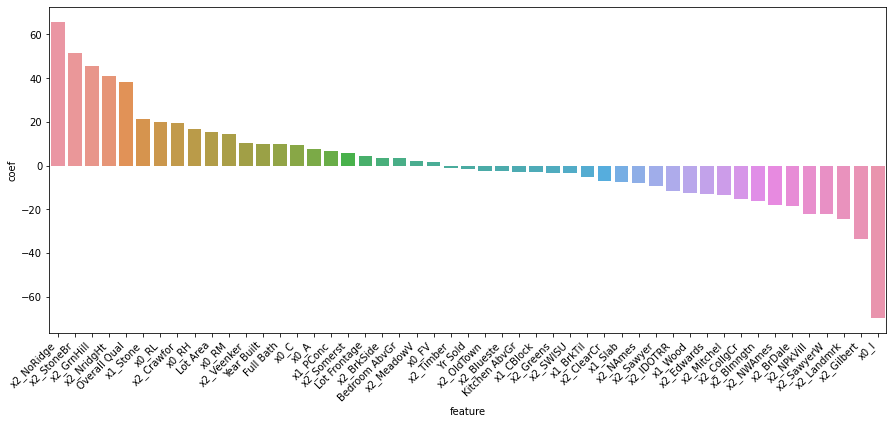

In [92]:
# getting feature names out of the preprocessors and glueing them together, along with their respective coefficients
coefs = pd.DataFrame({'feature': np.hstack((imputer_num.feature_names_in_, ohe.get_feature_names_out())),
                      'coef': ridge_all.coef_})

# plotting each feature's coefficient value - sorted descendingly
plt.figure(figsize=(15,6))

sns.barplot(data = coefs.sort_values(by = 'coef', ascending = False), x = 'feature', y = 'coef')
plt.xticks(rotation=45, ha='right');

**Questions:**

Looking at the plot:
 - What categorical feature would you say is more important for your model?
 - What about the most important numerical feature?
 - An increase in Lot Area will increase or decrease the SalePrice prediction?
 - Do you think a house being in an Industrial block (`MS Zoning = I`) impacts the SalePrice?